In [1]:
import numpy as np
import pandas as pd
#matplotlib.use('MacOSX')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_set = pd.DataFrame(pd.read_csv('KAG_energydata_complete.csv'))

###### From https://www.kaggle.com/loveall/appliances-energy-prediction:
**date** time year-month-day hour:minute:second; **Appliances** energy use in Wh; **lights** energy use of light fixtures in the house in Wh; **T1** Temperature in kitchen area, in Celsius; **RH_1** Humidity in kitchen area, in %; **T2** Temperature in living room area, in Celsius; **RH_2** Humidity in living room area, in %; **T3** Temperature in laundry room area; **RH_3** Humidity in laundry room area, in %; **T4** Temperature in office room, in Celsius; **RH_4** Humidity in office room, in %; **T5** Temperature in bathroom, in Celsius; **RH_5** Humidity in bathroom, in %; **T6** Temperature outside the building (north side), in Celsius; **RH_6** Humidity outside the building (north side), in %; **T7** Temperature in ironing room , in Celsius; **RH_7** Humidity in ironing room, in %; **T8** Temperature in teenager room 2, in Celsius; **RH_8** Humidity in teenager room 2, in %: **T9** Temperature in parents room, in Celsius; **RH_9** Humidity in parents room, in %; **T_out** Temperature outside (from Chievres weather station), in Celsius; **Press_mm_hg** (from Chievres weather station); **RH_out** Humidity outside (from Chievres weather station), in %; **Windspeed** (from Chievres weather station), in m/s; **Visibility** (from Chievres weather station), in km; **Tdewpoint** (from Chievres weather station), Â°C; **rv1** Random variable 1, nondimensional; **rv2** Random variable 2, nondimensional

In [3]:
data_set.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
data_set.info()
# 19735 rows and 29 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [5]:
# Looking for missing values:
data_set.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### Dividing the data set into 2 data sets:
1. Series data: **data**, with all columns except for 'date'


2. Timeseries data: **data_t**, with only 'date' and 'Appliances' columns

In [6]:
# timeseries data set:
data_t = data_set[['date', 'Appliances']] # in the other notebook just 'data'

# series data set:
data = data_set.copy()
data.drop(['date'], axis=1 , inplace= True)

# Series data exploration and modeling
## Descriptive statistics

In [7]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
# dependent (target) value is 'Appliances':
target = data[['Appliances']]

# independent variables (features) can be split into 3 categories: temperatures, humidities, and other variables:
temperatures = data[['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out','Tdewpoint']]
humidities = data[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']]
other_vars = data[['lights', 'Press_mm_hg','Windspeed', 'Visibility','rv1','rv2']]

features = pd.concat([temperatures, humidities, other_vars], axis = 1)

### Temperatures

In [9]:
temperatures.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,7.411665,3.760707
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,5.317409,4.194648
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,-5.000000,-6.600000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,3.666667,0.900000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,6.916667,3.433333
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,10.408333,6.566667
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000,15.500000


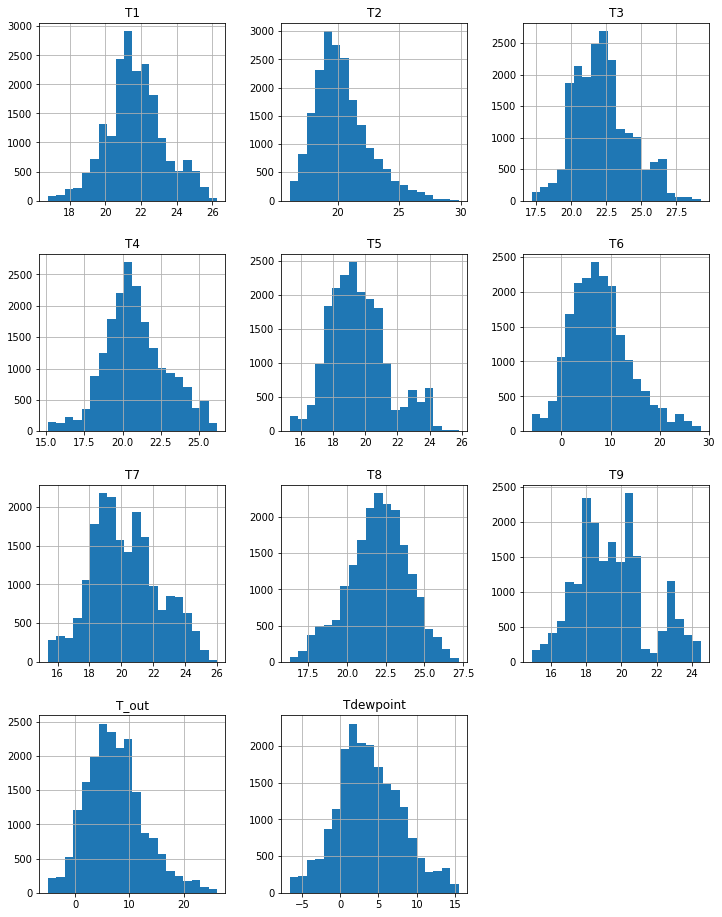

In [10]:
temperatures.hist(bins = 20 , figsize= (12,16)) #bin width differs for each variable
plt.show()

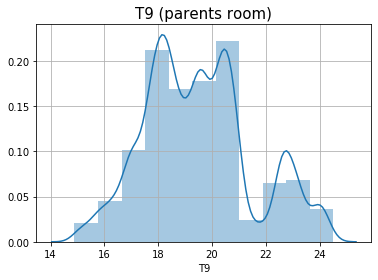

In [11]:
# Looking into T9 in more detail:
sns.distplot(temperatures.T9, bins = 11) # bin width = 1
plt.title('T9 (parents'' room)', fontsize = 15)
plt.grid()

#### Remarks:

- Temperatures range from -6 degrees (outside) to around +30 degrees (living room and laundry room)
- All temperature distributions seem to follow the normal distribution, with the exception of T9 (though it's similar to T5 and T7, which do follow the ND) - it's the parents' room, so maybe they cannot agree on the ideal temperature :)
- Some temperatures are positively skewed (T2, T6, and T_out)

### Humidities


In [12]:
humidities.describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,79.750418
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,14.901088
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,83.666667
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000


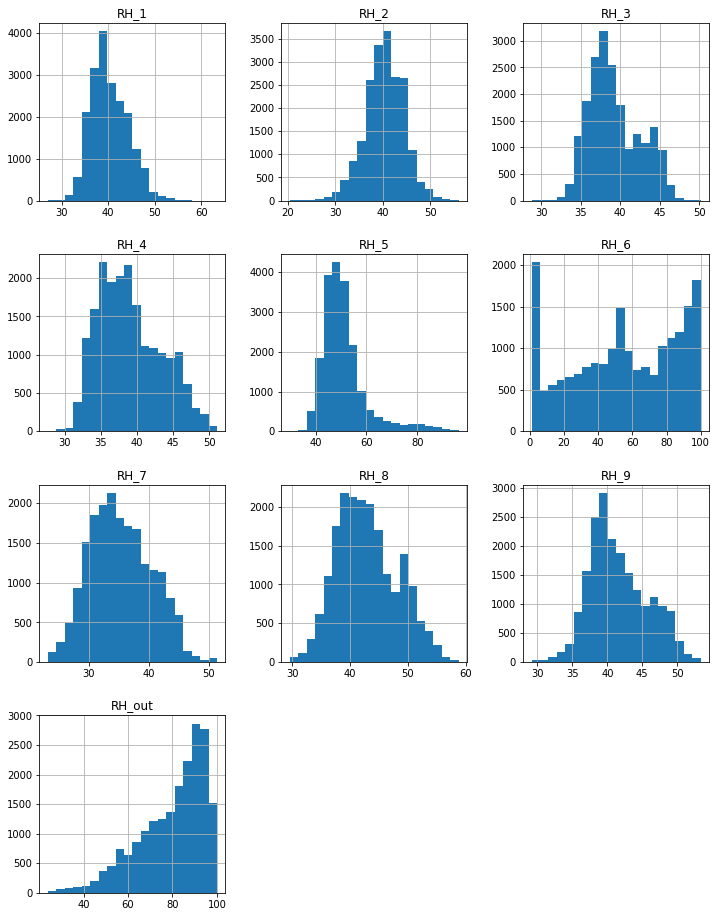

In [13]:
humidities.hist(bins = 20 , figsize= (12,16)) #bin width differs for each variable
plt.show()

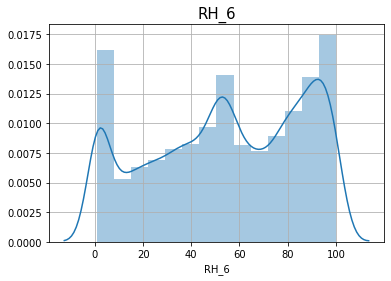

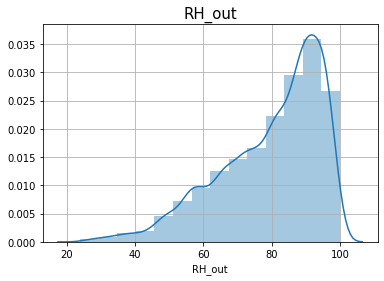

In [14]:
# Looking into RH_6 and RH_out
sns.distplot(humidities.RH_6, bins = 14) # bin width = 5
plt.title('RH_6', fontsize = 15)
plt.grid()
plt.show()
sns.distplot(humidities.RH_out, bins = 14) # bin width = 5
plt.title('RH_out', fontsize = 15)
plt.grid()
plt.show()

#### Remarks:

- Humidities range from 1% to 100%
- All humidity distributions seem to follow the normal distribution, with the exception of RH_6 and RH_out - both measurements from the outside, so it makes sense that they don't follow the normal distribution like the indoor ones
- RH_5 is positively skewed (bathroom), so the occurances of higher humidity might be related to when people are using the shower/bath 

### Other independent variables

In [15]:
other_vars.describe()

,lights,Press_mm_hg,Windspeed,Visibility,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,3.801875,755.522602,4.039752,38.330834,24.988033,24.988033
std,7.935988,7.399441,2.451221,11.794719,14.496634,14.496634
min,0.000000,729.300000,0.000000,1.000000,0.005322,0.005322
25%,0.000000,750.933333,2.000000,29.000000,12.497889,12.497889
50%,0.000000,756.100000,3.666667,40.000000,24.897653,24.897653
75%,0.000000,760.933333,5.500000,40.000000,37.583769,37.583769
max,70.000000,772.300000,14.000000,66.000000,49.996530,49.996530


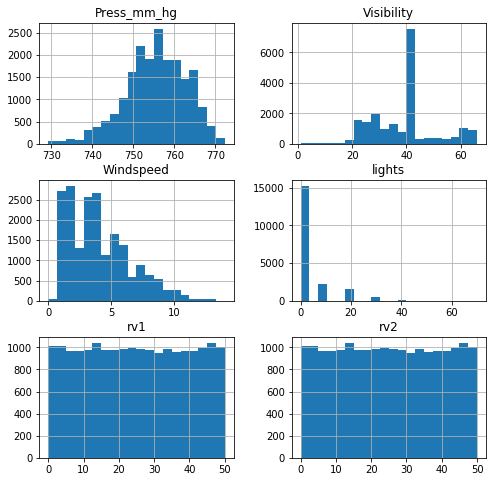

In [16]:
other_vars.hist(bins = 20 , figsize= (8,8)) #bin width differs for each variable
plt.show()

In [17]:
# Looking into 'Visibility' to find the most common value: 
(other_vars.Visibility.value_counts()).head()

40.000000    7224
29.000000     449
36.333333     257
23.000000     247
28.000000     245
Name: Visibility, dtype: int64

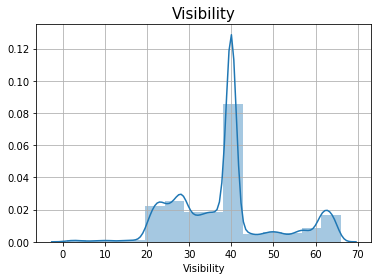

In [18]:
sns.distplot(other_vars.Visibility, bins = 14)
plt.title('Visibility', fontsize = 15)
plt.grid()

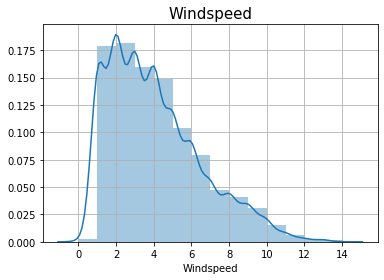

In [19]:
# Looking into 'Windspeed' in more detail:
sns.distplot(other_vars.Windspeed, bins = 14)
plt.title('Windspeed', fontsize = 15)
plt.grid()

In [20]:
# Looking into 'lights' in more detail:
other_vars.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

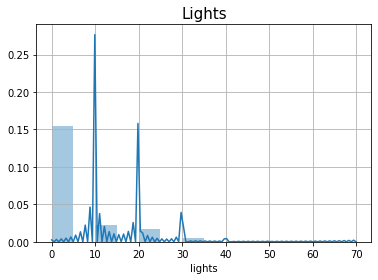

In [21]:
sns.distplot(other_vars.lights, bins = 14)
plt.title('Lights', fontsize = 15)
plt.grid()

#### Remarks:

- Pressure ranges from 730 to 772 mm Hg and follows the normal distributions
- Visibility ranges from 1 to 66 km and does not follow the normal distribution (which makes sense); the most common Visibility value is 40 km (~37%)
- Windspeed ranges from 0 to 14 m/s and and it looks like it actually does follow the normal distribution, but is positively skewed; low windspeed seems to dominate with the average of 4 m/s
- Lights ranges from 0 to 70 Wh, with 77% of the values being 0 - makes sense, as for the most part the lights are turned off; the distribution is not normal, but is very positively skewed
- Random variables rv1 and rv2 don't follow the normal distribution and are all the values seem to be almost evenly distributed, which indicates that these variables probably don't affect the target variable

### Appliances (target variable)

In [22]:
(target.describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.0,50.0,60.0,100.0,1080.0


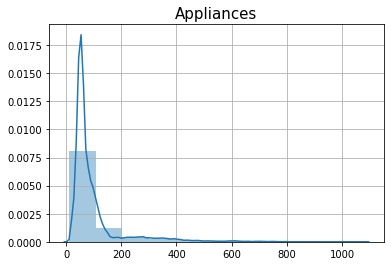

In [23]:
sns.distplot(target, kde = True, bins = 11) #bin width = 100
#plt.xlabel('Appliances', fontsize = 14)
#plt.ylabel('Counts', fontsize = 14)
plt.title('Appliances', fontsize = 15)
plt.grid()

In [24]:
target.Appliances.value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
870        1
890        1
900        1
860        1
1070       1
Name: Appliances, Length: 92, dtype: int64

In [25]:
# checking how many single occurances are there
print((target.Appliances.value_counts() == 1).value_counts(), 
      '\n\nPercent of singular occurances in the data set:', round(10/len(target), 3)*100, '%', 
      '\n\nPercent of singular occurances among value counts:', 
      round(10/92, 2)*100, '%')

False    82
True     10
Name: Appliances, dtype: int64 

Percent of singular occurances in the data set: 0.1 % 

Percent of singular occurances among value counts: 11.0 %


In [26]:
# finding the values between in different ranges:
print('Percent of values no greater than 200 Wh: ', 
      round(((target.loc[target.Appliances <= 200]['Appliances']).count() )/len(target)*100, 1), '%',
     '\n\nPercent of values no greater 100 Wh: ', 
      round(((target.loc[target.Appliances <= 100]['Appliances']).count() )/len(target)*100, 1), '%',
     '\n\nPercent of values greater than 400 Wh: ',
      round(((target.loc[target.Appliances > 400]['Appliances']).count() )/len(target)*100, 1), '%')

Percent of values no greater than 200 Wh:  90.3 % 

Percent of values no greater 100 Wh:  78.6 % 

Percent of values greater than 400 Wh:  2.7 %


#### Remarks:

- Energy consumption of appliances ranges from 0 to 1080 Wh
- Most values are bewteen 0 and 200 Wh, inclusive (90.3%); only 2.7% of the values are greater than 400 Wh; 78.6% are no greater than 100 Wh --> this is a low energy consumption household based on the appliances energy consumption
- The distribution is very positively skewed (unlike any feature)
- High standard deviation (~103 Wh) makes sense, as the 9.7% percent od values greater than 400 Wh have some very high consumption single occurances (like 1080 Wh, 1070 Wh, 900 Wh, etc.) 


- The high energy consumption occurances can be further investigated (is it related to the time of the day, a specific date,...?)

## Variable selection
80% train and 20% test data split

In [27]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train, y_test = train_test_split(
    features, target, test_size = 0.2, random_state=40) 
train_df = pd.concat([y_train, X_train_df],  axis = 1)
test_df = pd.concat([y_test, X_test_df],  axis = 1)

temp_train = X_train_df[['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out','Tdewpoint']]
hum_train = X_train_df[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']]
other_train = X_train_df[['lights', 'Press_mm_hg','Windspeed', 'Visibility','rv1','rv2']]

# train_df.info(), test_df.info()

Finding the correlations between variables, to best select variables for the model

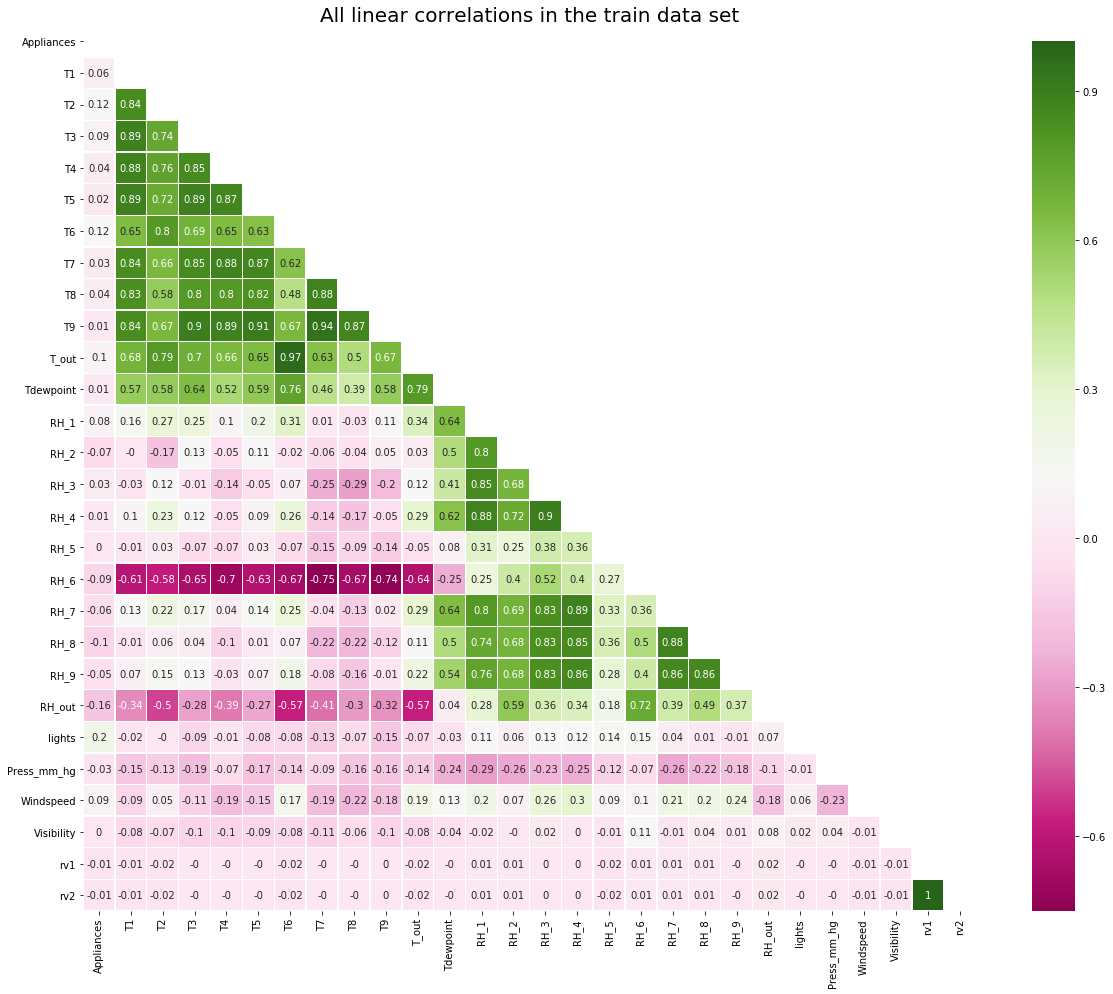

In [28]:
corr = train_df.corr() # finds linear correlation coefficient ('Pearson') between variables

# creating the mask to remove the values that are repeating (masks the upper triangle of a given corr. matrix)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plotting the heat map of all correlations
fig, ax = plt.subplots(figsize = (20,16))
sns.heatmap(round(corr,2), annot = True, linewidths = .4, mask = mask, cmap = 'PiYG', ax = ax)
ax.set_title('All linear correlations in the train data set', fontsize = 20, pad = 20)
ax.set_ylim(len(corr))
plt.show()

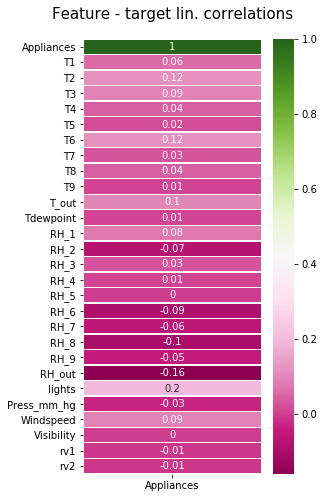

In [29]:
# Plotting the heat map of only correlations with the target
fig, ax = plt.subplots(figsize = (4,8))
sns.heatmap(round(corr[['Appliances']], 2), cmap = 'PiYG', linewidths = .4, annot = True, ax = ax)
ax.set_ylim(len(corr), 0 )
ax.set_title('Feature - target lin. correlations', fontsize = 15, pad = 20)
plt.show()

In [30]:
print('Features with significant linear correlation with the target:\n\n', 
      (round(corr[['Appliances']], 2)[round(corr['Appliances'], 1) != 0]))

Features with significant linear correlation with the target:

             Appliances
Appliances        1.00
T1                0.06
T2                0.12
T3                0.09
T6                0.12
T_out             0.10
RH_1              0.08
RH_2             -0.07
RH_6             -0.09
RH_7             -0.06
RH_8             -0.10
RH_9             -0.05
RH_out           -0.16
lights            0.20
Windspeed         0.09


#### Remarks:
- It is clear from the heat map that there are no strong linear correlations between the target ('Appliances') and any of the features
- Only two values that clearly have no linear correlation with the target (Visibility and RH_5 - as expected since they're distributions differ a lot)
- Looking only at the variables with significant correlation with the target (coeff >= +/- 0.05) only 14 features have an either positive or negative linear correlation with the target (T1, T2, T3, T6, T_out, RH_1, RH_2, RH_6, RH_7, RH_8, RH_9, RH_out, lights, and Windspeed)
- The strongest correlation is with the target have lights, followed by RH_out, and T2
- There are, however, some strong correlations between different feaures

Since no value has the distribution quite like the target, it might be good to look into other methods for quanitifying the correlations between variables. 

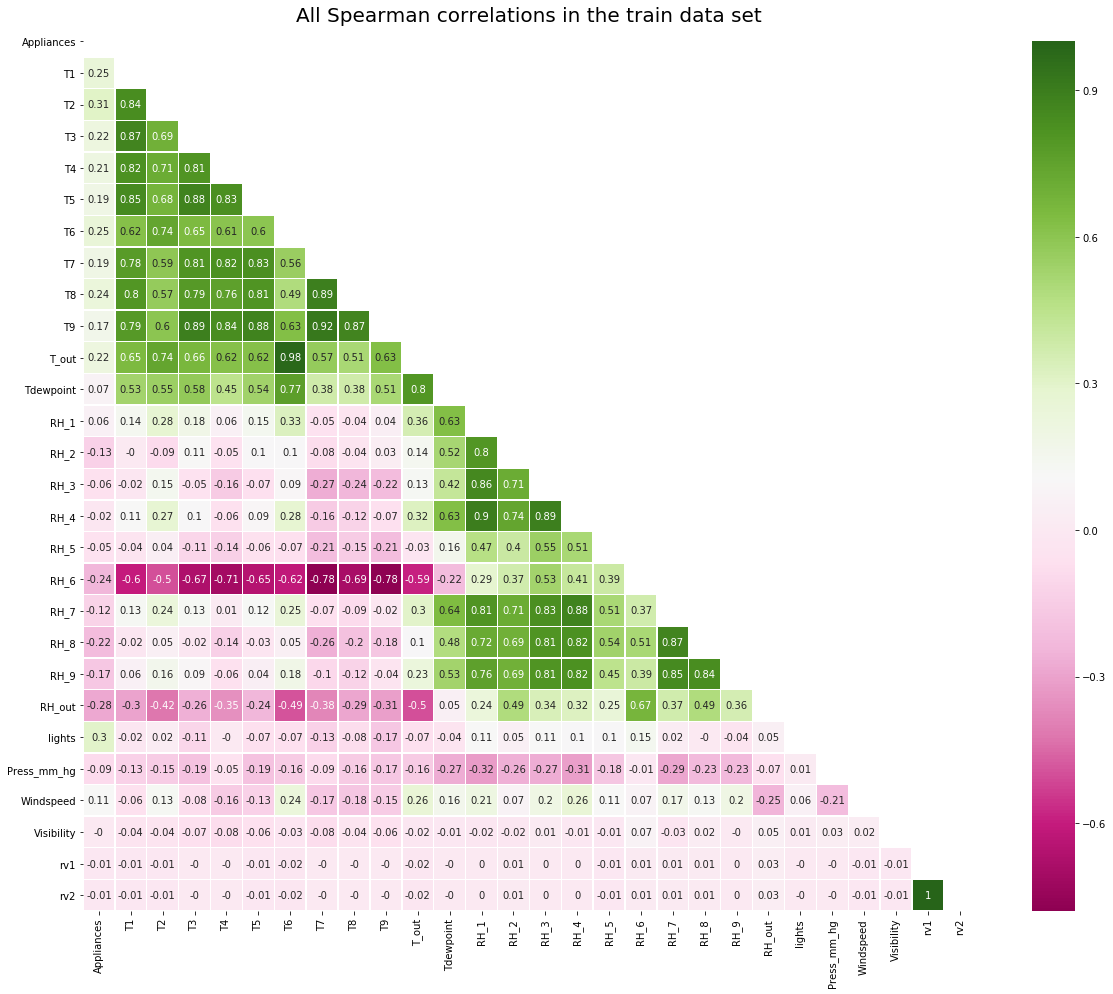

In [31]:
# Spearman method for determining any correlation, using value ranks 
corr_s = train_df.corr(method = 'spearman') 

# creating the mask to remove the values that are repeating (masks the upper triangle of a given corr. matrix)
mask = np.zeros_like(corr_s, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plotting the heat map of all correlations
fig, ax = plt.subplots(figsize = (20,16))
sns.heatmap(round(corr_s,2), annot = True, linewidths = .4, mask = mask, cmap = 'PiYG', ax = ax)
ax.set_title('All Spearman correlations in the train data set', fontsize = 20, pad = 20)
ax.set_ylim(len(corr_s))
plt.show()

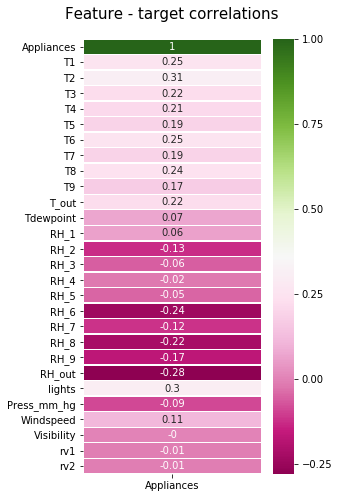

In [32]:
# Plotting the heat map of only correlations with the target
fig, ax = plt.subplots(figsize = (4,8))
sns.heatmap(round(corr_s[['Appliances']], 2), cmap = 'PiYG', linewidths = .4, annot = True, ax = ax)
ax.set_ylim(len(corr_s), 0 )
ax.set_title('Feature - target correlations', fontsize = 15, pad = 20)
plt.show()

In [33]:
print('Features with NO significant correlation with the target:\n\n', 
      (round(corr_s[['Appliances']], 1)[round(corr_s['Appliances'], 1) == 0]))

Features with NO significant correlation with the target:

             Appliances
RH_4              -0.0
RH_5              -0.0
Visibility        -0.0
rv1               -0.0
rv2               -0.0


#### Remarks:
- Still only Visibility has no correlation at all with the target 
- Looking only at the variables with significant correlation with the target (coeff >= +/- 0.05) there are now 22 features have an either positive or negative linear correlation with the target (exluding only random variables rv1 and rv2, RH_4, RH_5, and Visibility - they can be dropped)
- The strongest correlation is with the target have lights, followed by RH_out, and T2

#### Correlations between features - exploration

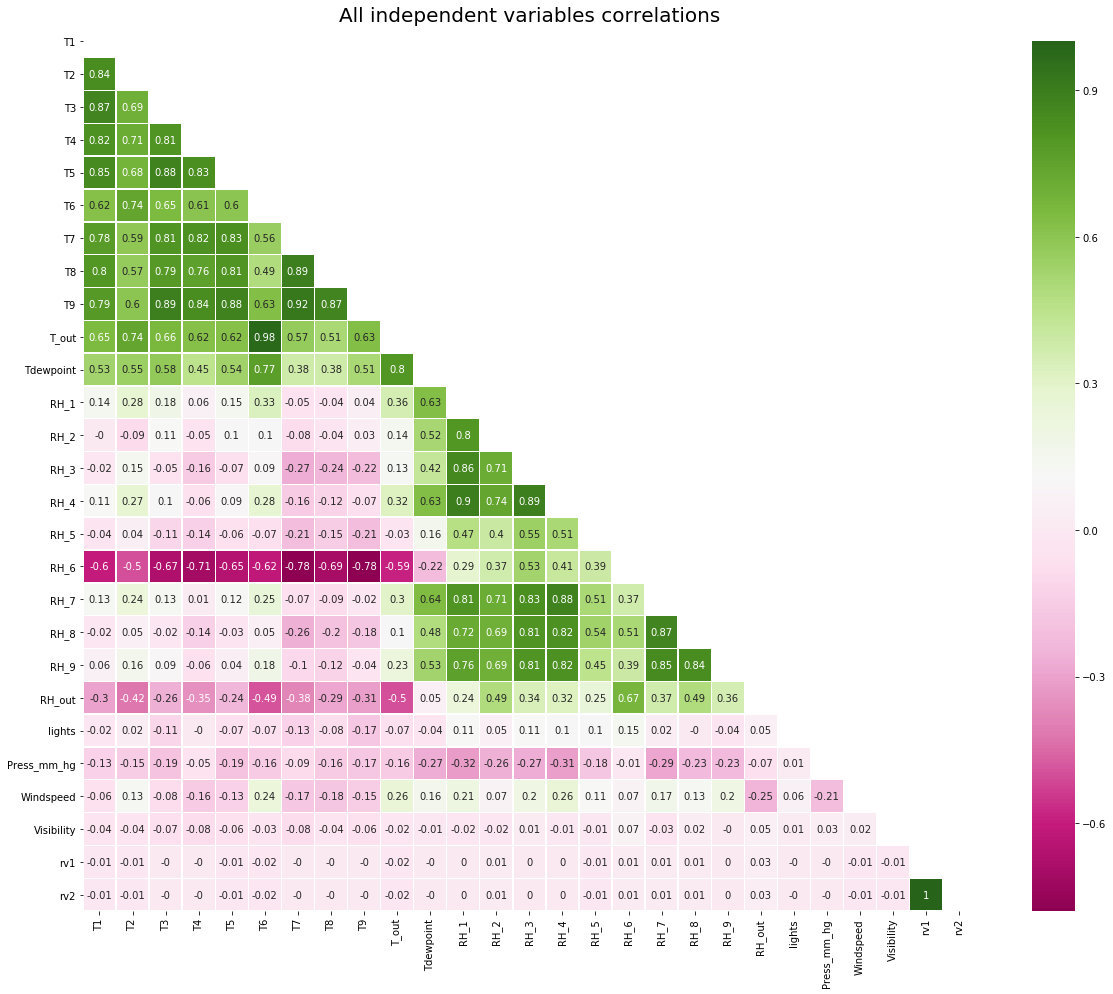

In [34]:
corr_vars = corr_s.copy()
corr_vars.drop(['Appliances'], axis = 1, inplace = True)
corr_vars.drop(['Appliances'], axis = 0, inplace = True)

# masking the values that are repeating (masks the upper triangle of a given correlation matrix)
mask_vars = np.zeros_like(corr_vars, dtype=np.bool)
mask_vars[np.triu_indices_from(mask_vars)] = True

# Plotting the heat map of all correlations
fig, ax = plt.subplots(figsize = (20,16))
sns.heatmap(round(corr_vars, 2), annot = True, linewidths = .4, mask = mask_vars, cmap = 'PiYG', ax = ax)
ax.set_title('All independent variables correlations', fontsize = 20, pad = 20)
ax.set_ylim(len(corr_vars))
plt.show()

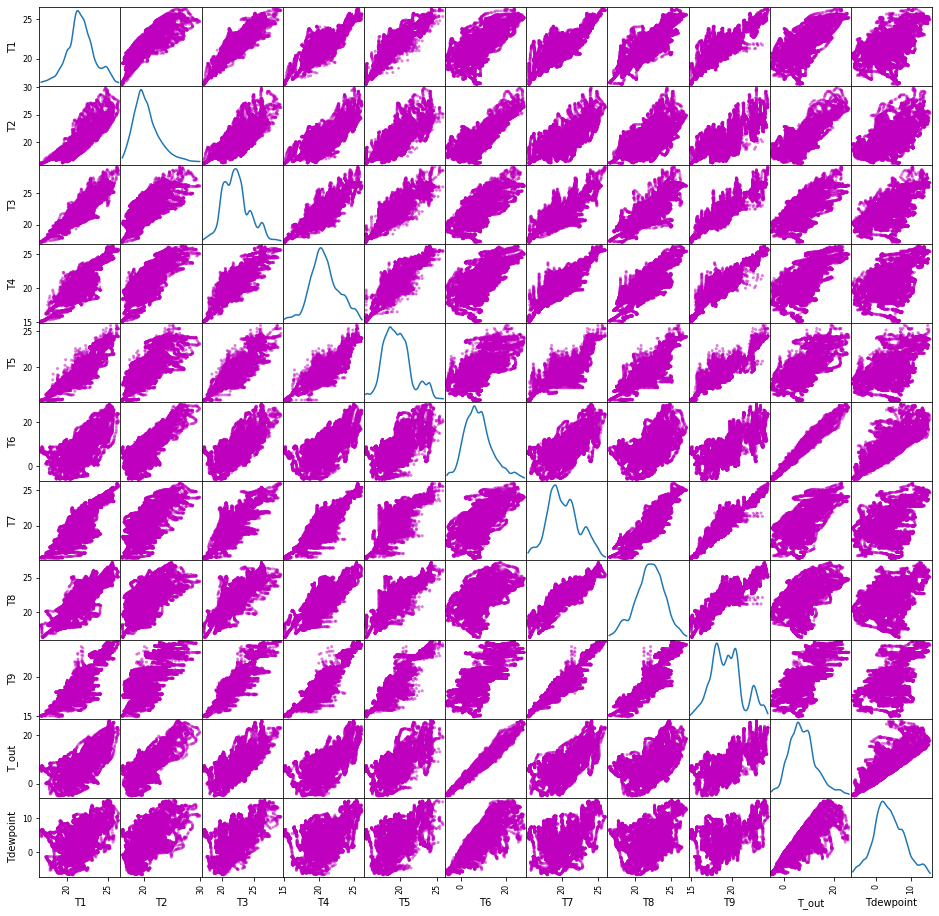

In [35]:
# looking at temperatures alone 
temp_scatter = pd.plotting.scatter_matrix(temp_train, diagonal="kde", color = 'm', figsize=(16, 16))
#sns.pairplot(temp_train)
plt.show()

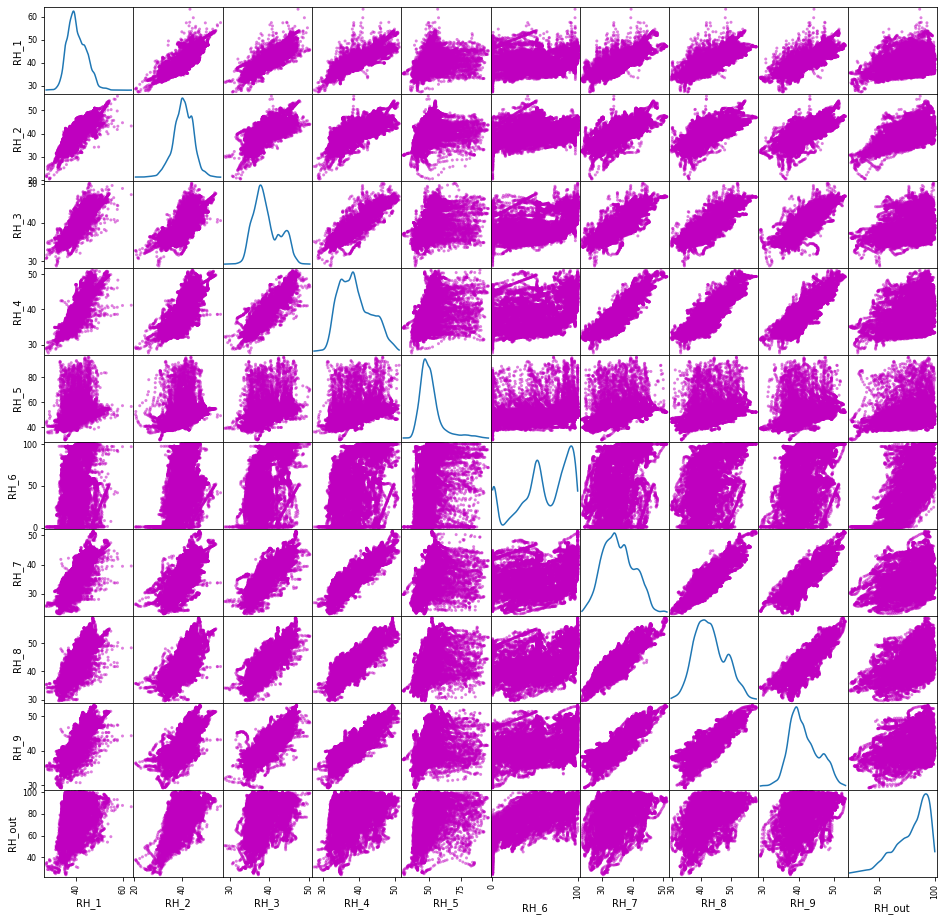

In [36]:
# looking at humidities alone 
hum_scatter = pd.plotting.scatter_matrix(hum_train, diagonal="kde", color = 'm', figsize=(16, 16))
#sns.pairplot(hum_train, palette)
plt.show()

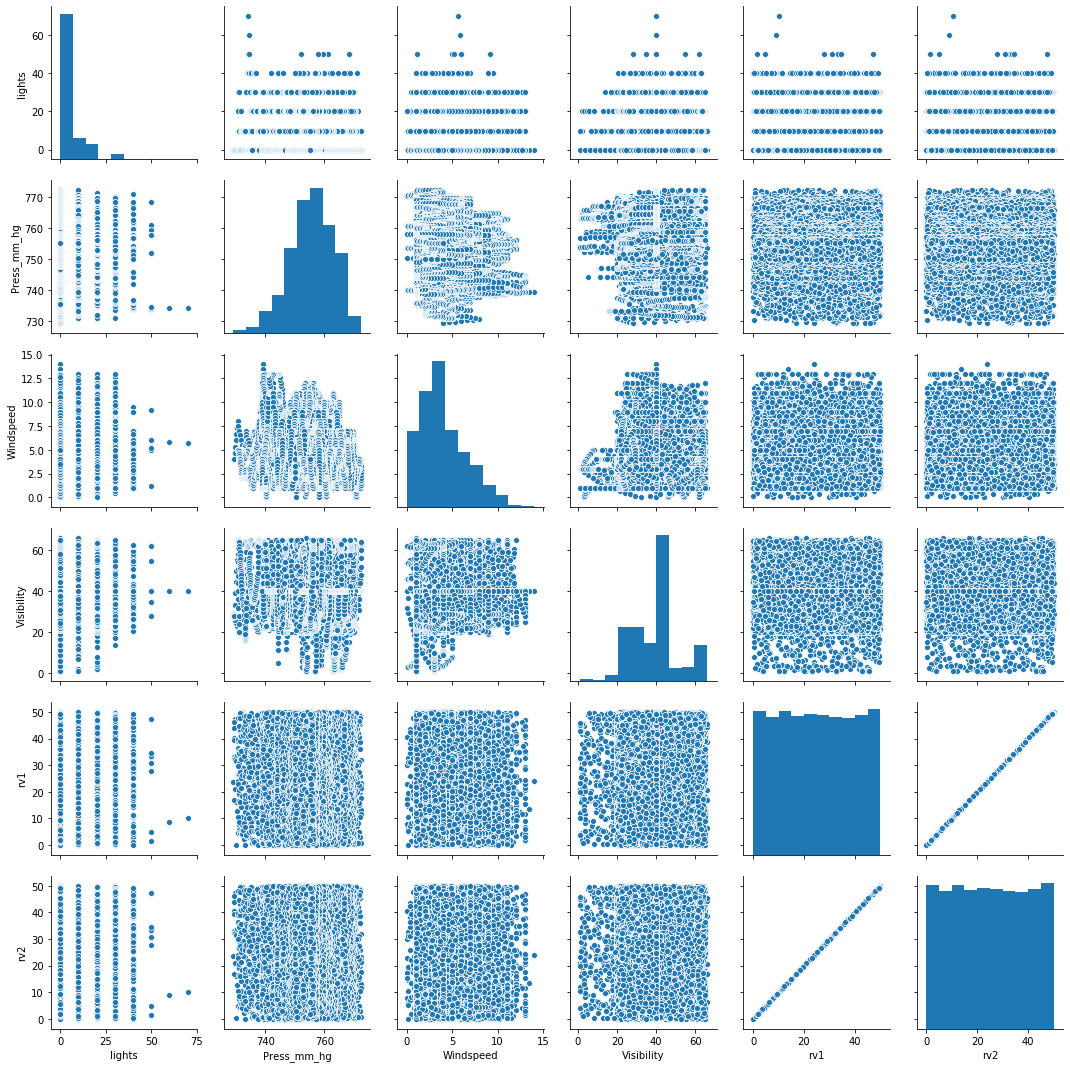

In [37]:
# looking at other variables alone 
#other_scatter = pd.plotting.scatter_matrix(other_train, diagonal="kde", color = 'm', figsize=(16, 16))
sns.pairplot(other_vars)
plt.show()

I want to find the strong (>0.7) and super strong (>0.9) correlation pairs

In [38]:
from itertools import combinations # for finding combinations
from scipy.stats import spearmanr # to find the corr() not on a data frame

print('Features with super strong correlation (>0.9):\n')
for pair in combinations(train_df, 2):
    col_1, col_2 = pair
    corr_coef, p_value = spearmanr(train_df[col_1], train_df[col_2])
    if corr_coef >= 0.9 or corr_coef <= -0.9:
        print('Features: {}, {}'.format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_value), '\n')
        
print('Features with strong correlation (>0.7, <0.9):\n')
for pair in combinations(train_df, 2):
    col_1, col_2 = pair
    corr_coef, p_value = spearmanr(train_df[col_1], train_df[col_2])
    if 0.7 <= corr_coef < 0.9 or -0.9 > corr_coef >= -0.7:
        print('Features: {}, {}'.format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_value), '\n')

Features with super strong correlation (>0.9):

Features: T6, T_out
Correlation coefficient : 0.9760458528640376
p-value : 0.0 

Features: T7, T9
Correlation coefficient : 0.9229579927543216
p-value : 0.0 

Features: rv1, rv2
Correlation coefficient : 0.9999999999999998
p-value : 0.0 

Features with strong correlation (>0.7, <0.9):

Features: T1, T2
Correlation coefficient : 0.8435111285056611
p-value : 0.0 

Features: T1, T3
Correlation coefficient : 0.867638161279933
p-value : 0.0 

Features: T1, T4
Correlation coefficient : 0.8181457580429286
p-value : 0.0 

Features: T1, T5
Correlation coefficient : 0.8533970820422303
p-value : 0.0 

Features: T1, T7
Correlation coefficient : 0.7788274583370917
p-value : 0.0 

Features: T1, T8
Correlation coefficient : 0.8044667684453262
p-value : 0.0 

Features: T1, T9
Correlation coefficient : 0.7878101901306271
p-value : 0.0 

Features: T2, T4
Correlation coefficient : 0.707385011749407
p-value : 0.0 

Features: T2, T6
Correlation coefficient : 

#### Remarks:
- T6 and T_out are extremely correlated (coeff ≈ 0.976), which makes sense given that they are both outdoor temperatures --> one of them can be dropped from the model (T_out, as it has lower corr. with the target)
- T7 and T9 are also super strongly correlated
- T9 has a strong correlation with 6 other temperatures (1,3,4,5,7,8) --> T9 can also be dropped from the model

- No super strong correlations between the humidity features, but there are many strong correlations between most of them (excluding RH_5, RH_6, and RH_out)

- For all cases of (super) strong correlation, the p-value was 0.0

Final features to be included in the model (20): **T1-T8, Tdewpoint, RH_1-RH_3, RH_6-RH_out, lights, Press_mm_hg, Windspeed**

In [39]:
# Creating new train and test data sets with filtered features

X_train = X_train_df.copy()
X_train.drop(['T9', 'T_out', 'RH_4', 'RH_5', 'rv1', 'rv2', 'Visibility'], axis = 1, inplace = True)

X_test = X_test_df.copy()
X_test.drop(['T9', 'T_out', 'RH_4', 'RH_5', 'rv1', 'rv2', 'Visibility'], axis = 1, inplace = True)

train = pd.concat([y_train, X_train],  axis = 1)
test = pd.concat([y_test, X_test],  axis = 1)

train.describe()

,Appliances,T1,T2,T3,T4,T5,T6,T7,T8,Tdewpoint,...,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Press_mm_hg,Windspeed
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,...,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,97.523436,21.678518,20.334025,22.260086,20.850323,19.583439,7.906445,20.258524,22.023867,3.760375,...,40.426742,39.250773,54.667153,35.395282,42.945911,41.561343,79.775016,3.827591,755.550528,4.051378
std,102.668076,1.606283,2.193174,1.999775,2.040500,1.842384,6.072646,2.104972,1.952412,4.187537,...,4.076340,3.258047,31.128068,5.126754,5.238856,4.163317,14.928167,7.954862,7.394142,2.453948
min,10.000000,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,-6.600000,...,20.463333,28.766667,1.000000,23.200000,29.600000,29.166667,24.000000,0.000000,729.333333,0.000000
25%,50.000000,20.730000,18.790000,20.790000,19.500000,18.288750,3.656667,18.700000,20.790000,0.916667,...,37.900000,36.900000,30.073667,31.500000,39.090000,38.500000,70.333333,0.000000,750.983333,2.000000
50%,60.000000,21.600000,20.000000,22.100000,20.658333,19.390000,7.300000,20.012698,22.100000,3.450000,...,40.500000,38.560000,55.300000,34.882976,42.400000,40.900000,83.833333,0.000000,756.100000,3.666667
75%,100.000000,22.600000,21.500000,23.290000,22.100000,20.615000,11.260000,21.600000,23.390000,6.566667,...,43.290000,41.790000,83.226806,39.000000,46.558750,44.363333,91.666667,0.000000,760.966667,5.500000
max,1080.000000,26.260000,29.856667,29.200000,26.200000,25.795000,28.290000,25.963333,27.230000,15.500000,...,56.026667,50.163333,99.900000,51.400000,58.780000,53.326667,100.000000,60.000000,772.300000,14.000000


It is clear that different variables fall in different ranges; This can cause problems when implementing the model (some features can have a significantly greater influence than others), so it's good to normalize the independent variables data along with the target.

I will normalize the variables to have the mean = 0 and std = 1

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_sc = train.copy()
train_sc[train_sc.columns] = scaler.fit_transform(train)
test_sc = test.copy()
test_sc[train_sc.columns] = scaler.fit_transform(test)

y_train_sc = train_sc[['Appliances']]
y_test_sc = test_sc[['Appliances']]

X_train_sc = train_sc.copy()
X_train_sc.drop(['Appliances'], axis = 1, inplace = True)
X_test_sc = test_sc.copy()
X_test_sc.drop(['Appliances'], axis = 1, inplace = True)

# creating a scaled original target
target_sc = target.copy()
target_sc[target_sc.columns] = scaler.fit_transform(target)

train_sc.describe()


,Appliances,T1,T2,T3,T4,T5,T6,T7,T8,Tdewpoint,...,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Press_mm_hg,Windspeed
count,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,...,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04
mean,-3.447718e-16,-7.138429e-18,-1.994928e-16,3.331355e-16,1.354180e-15,1.062633e-17,4.861972e-17,4.741566e-16,-5.545560e-16,-4.883772e-18,...,4.129371e-16,-2.587713e-15,-1.085119e-16,5.116287e-16,-6.559373e-16,1.310219e-15,-3.585511e-16,5.932816e-16,4.170361e-15,5.571508e-17
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,...,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-8.525163e-01,-3.043469e+00,-1.930609e+00,-2.530408e+00,-2.818184e+00,-2.308733e+00,-2.300791e+00,-2.312942e+00,-2.928368e+00,-2.474176e+00,...,-4.897541e+00,-3.218013e+00,-1.724131e+00,-2.378829e+00,-2.547566e+00,-2.977210e+00,-3.736345e+00,-4.811789e-01,-3.545783e+00,-1.651016e+00
25%,-4.628989e-01,-5.905237e-01,-7.040366e-01,-7.351489e-01,-6.617817e-01,-7.027470e-01,-6.998454e-01,-7.404249e-01,-6.319904e-01,-6.791100e-01,...,-6.198752e-01,-7.215510e-01,-7.900993e-01,-7.598191e-01,-7.360448e-01,-7.353368e-01,-6.324944e-01,-4.811789e-01,-6.176970e-01,-8.359766e-01
50%,-3.654946e-01,-4.888343e-02,-1.523071e-01,-8.005454e-02,-9.409250e-02,-1.049972e-01,-9.986825e-02,-1.167871e-01,3.899565e-02,-7.412110e-02,...,1.797209e-02,-2.120272e-01,2.033108e-02,-9.993113e-02,-1.042075e-01,-1.588551e-01,2.718650e-01,-4.811789e-01,7.431410e-02,-1.567774e-01
75%,2.412281e-02,5.736916e-01,5.316549e-01,5.150312e-01,6.124559e-01,5.599231e-01,5.522570e-01,6.373095e-01,6.997377e-01,6.701745e-01,...,7.024313e-01,7.793958e-01,9.175178e-01,7.031412e-01,6.896455e-01,6.730401e-01,7.966168e-01,-4.811789e-01,7.325136e-01,5.903418e-01
max,9.569749e+00,2.852316e+00,4.342084e+00,3.470457e+00,2.621831e+00,3.371586e+00,3.356725e+00,2.710245e+00,2.666598e+00,2.803556e+00,...,3.827065e+00,3.349524e+00,1.453167e+00,3.121902e+00,3.022528e+00,2.826039e+00,1.354863e+00,7.061617e+00,2.265307e+00,4.054258e+00


I will try to implement the regression models: **Linear Regression, LassoCV, RidgeCV**
### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn import metrics

lr = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()

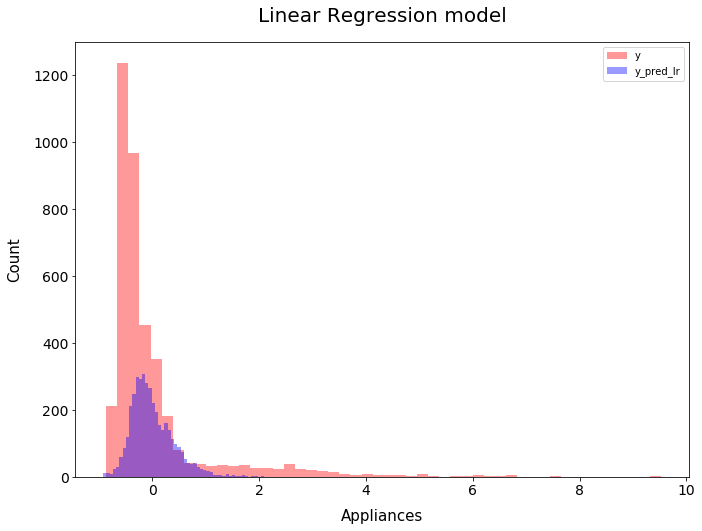

In [42]:
# Linear Regression - model training

lr.fit(X_train_sc, y_train_sc)

# what are the coefficients?
coeff_lr = (pd.DataFrame(lr.coef_, columns = X_train_sc.columns)).rename(index = {0:'Coefficients'})

# predicting the test data:
y_pred_lr = lr.predict(X_test_sc).reshape(3947,)

# comparing the predicted value with the real one:
lr_comparison = pd.DataFrame({'Predicted': y_pred_lr, 'Actual': y_test_sc['Appliances'].values})

# histogram of the aactual target and its predicted value - predicted value is the tiny line on the left
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(y_test_sc, kde=False, color='red', bins=50, label='y') # instead of y_test_sc: target_sc
sns.distplot(y_pred_lr, kde=False, color='blue', bins=50, label='y_pred_lr')
plt.xlabel('Appliances', fontsize=15, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=15, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.title('Linear Regression model', fontsize = 20, pad = 20)
plt.show()

In [43]:
# looking at R^2 score of the training data and test data
lr_score_train = lr.score(X_train_sc, y_train_sc) 
lr_score_test = lr.score(X_test_sc, y_test_sc)

print('Linear Regression R^2 score on train data:\n', lr_score_train,
      '\n\nLinear Regression R^2 score on test data:\n', lr_score_test)

# looking at the error values: 

# mean absolute error:
mae_lr = metrics.mean_absolute_error(y_test_sc, y_pred_lr) 
# mean squared error:
mse_lr = metrics.mean_squared_error(y_test_sc, y_pred_lr)
# root mean squared error:
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_sc, y_pred_lr))

# error values:
print('\nLinear Regression errors:')
print('\nMean Absolute Error:', mae_lr)  
print('Mean Squared Error:', mse_lr)  
print('Root Mean Squared Error:', rmse_lr) # around 1% of the mean value(97.7)

Linear Regression R^2 score on train data:
 0.16136416093750106 

Linear Regression R^2 score on test data:
 0.14887077070157873

Linear Regression errors:

Mean Absolute Error: 0.5266674708550285
Mean Squared Error: 0.8511292292984213
Root Mean Squared Error: 0.9225666530383706


#### Remarks:
- R^2 score is 0.16 on the train data and ~0.15 on the test data - not good (ideal is 1.0)
- Plotting the predicted target values and actual target values confirms that the linear regression model is not good 
- All the errors are less than 1% 
- Since there are no significant linear correlations of features and target, I need to create polynomials from the features and then apply linear regression model

### Polynomial Features and Linear Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures()

# dropping the features that previously had 0 correlation with the target:
features2 = features.copy()
features2.drop(['T9', 'T_out', 'RH_4', 'RH_5', 'rv1', 'rv2', 'Visibility'], axis = 1, inplace = True)

# creating features as polynomials
X_poly = pd.DataFrame(pf.fit_transform(features2), columns = pf.get_feature_names())

# split the new data set
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, target, test_size = 0.2, random_state=0)
train_poly = pd.concat([y_train, X_train_poly],  axis = 1)
test_poly = pd.concat([y_test, X_test_poly],  axis = 1)

# scale the new data set
train_poly_sc = train_poly.copy()
train_poly_sc[train_poly_sc.columns] = scaler.fit_transform(train_poly)
test_poly_sc = test_poly.copy()
test_poly_sc[test_poly_sc.columns] = scaler.fit_transform(test_poly)

X_train_poly_sc = train_poly_sc.copy()
X_train_poly_sc.drop(['Appliances'], axis = 1, inplace = True)
X_test_poly_sc = test_poly_sc.copy()
X_test_poly_sc.drop(['Appliances'], axis = 1, inplace = True)

# y_train_sc, y_test_sc are good from before

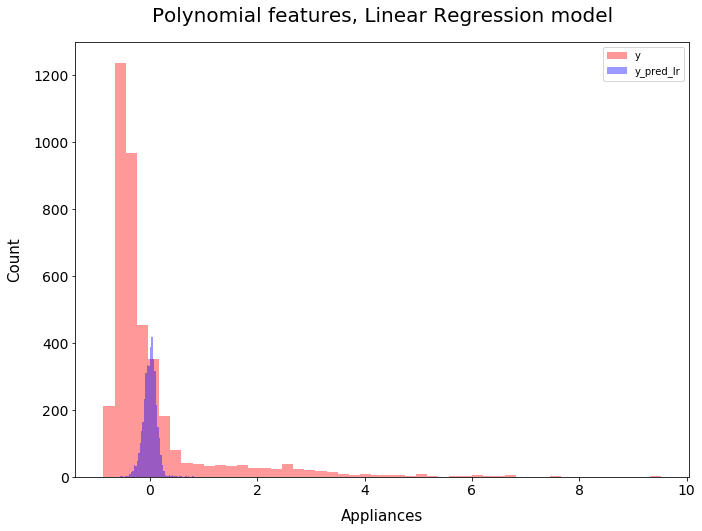

In [45]:
# use X_train_poly_sc instead of X_train_sc in the model

lr.fit(X_train_poly_sc, y_train_sc)

# what are the coefficients?
coeff_poly_lr = (pd.DataFrame(lr.coef_, columns = X_train_poly_sc.columns)).rename(index = {0:'Coefficients'})

# predicting the test data
y_pred_poly_lr = lr.predict(X_test_poly_sc)#.reshape(3947,)

# histogram of the aactual target and its predicted value - predicted value is the tiny line on the left
fig, ax = plt.subplots(figsize = (11,8))
sns.distplot(y_test_sc, kde=False, color='red', bins=50, label='y') # instead of y_test_sc: target_sc
sns.distplot(y_pred_poly_lr, kde=False, color='blue', bins=50, label='y_pred_lr')
plt.xlabel('Appliances', fontsize=15, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=15, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.title('Polynomial features, Linear Regression model', fontsize = 20, pad = 20)
plt.show()

In [46]:
# looking at R^2 score of the training data and test data
lr_score_poly_train = lr.score(X_train_poly_sc, y_train_sc) 
lr_score_poly_test = lr.score(X_test_poly_sc, y_test_sc)

print('Linear Regression with polynomial features R^2 score on train data:\n', lr_score_poly_train,
      '\n\nLinear Regression with polynomial features R^2 score on test data:\n', lr_score_poly_test)

# mean absolute error:
mae_poly_lr = metrics.mean_absolute_error(y_test_sc, y_pred_poly_lr) 
# mean squared error:
mse_poly_lr = metrics.mean_squared_error(y_test_sc, y_pred_poly_lr)
# root mean squared error:
rmse_poly_lr = np.sqrt(metrics.mean_squared_error(y_test_sc, y_pred_poly_lr))

# error values:
print('\nLinear Regression with polynomial features errors:')
print('\nMean Absolute Error:', mae_poly_lr)  
print('Mean Squared Error:', mse_poly_lr)  
print('Root Mean Squared Error:', rmse_poly_lr) 

Linear Regression with polynomial features R^2 score on train data:
 0.012551662829361931 

Linear Regression with polynomial features R^2 score on test data:
 -0.014369685428886392

Linear Regression with polynomial features errors:

Mean Absolute Error: 0.600057171027512
Mean Squared Error: 1.0143696854288864
Root Mean Squared Error: 1.007159215530934


#### Remarks:
- R^2 score is 0.013 on the train data (1.3%) and -0.014 (1.44%) on the test data - not good at all 
- Plotting the predicted target values and actual target values confirms that the linear regression model is not good 
- Since polynomial features scored less than original features, I will revert back to original features for the rest of the models


- **It is clear that the linear regression isn't the model to use on this data set**

### Lasso CV
Another linear model which fits by iteration

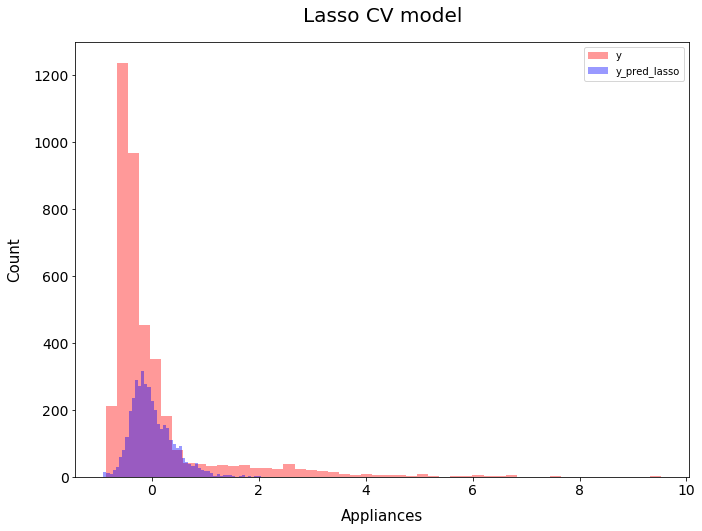

In [47]:
# Lasso model training:
import warnings
warnings.simplefilter(action='ignore')

lasso.fit(X_train_sc, y_train_sc)

y_pred_lasso = lasso.predict(X_test_sc)#.reshape(3947,)

fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(y_test_sc, kde=False, color='red', bins=50, label='y')# instead of y_test_sc: target_sc
sns.distplot(y_pred_lasso, kde=False, color='blue', bins=50, label='y_pred_lasso')
plt.xlabel('Appliances', fontsize=15, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=15, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.title('Lasso CV model', fontsize = 20, pad = 20)
plt.show()

In [48]:
# looking at R^2 score of the training data and test data
lasso_score_train = lasso.score(X_train_sc, y_train_sc) 
lasso_score_test = lasso.score(X_test_sc, y_test_sc)

print('Lasso R^2 score on train data:\n', lasso_score_train,
      '\n\nLasso R^2 score on test data:\n', lasso_score_test)

# looking at the error values: 

# mean absolute error:
mae_lasso = metrics.mean_absolute_error(y_test_sc, y_pred_lr) 
# mean squared error:
mse_lasso = metrics.mean_squared_error(y_test_sc, y_pred_lr)
# root mean squared error:
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test_sc, y_pred_lr))

# error values:
print('\nLasso errors:')
print('\nMean Absolute Error:', mae_lasso)  
print('Mean Squared Error:', mse_lasso)  
print('Root Mean Squared Error:', rmse_lasso) 

Lasso R^2 score on train data:
 0.16129192926181224 

Lasso R^2 score on test data:
 0.14915478204236177

Lasso errors:

Mean Absolute Error: 0.5266674708550285
Mean Squared Error: 0.8511292292984213
Root Mean Squared Error: 0.9225666530383706


#### Remarks:
- Not a good model - basically the same as the linear regression

### Ridge CV
Ridge regression with built-in cross-validation

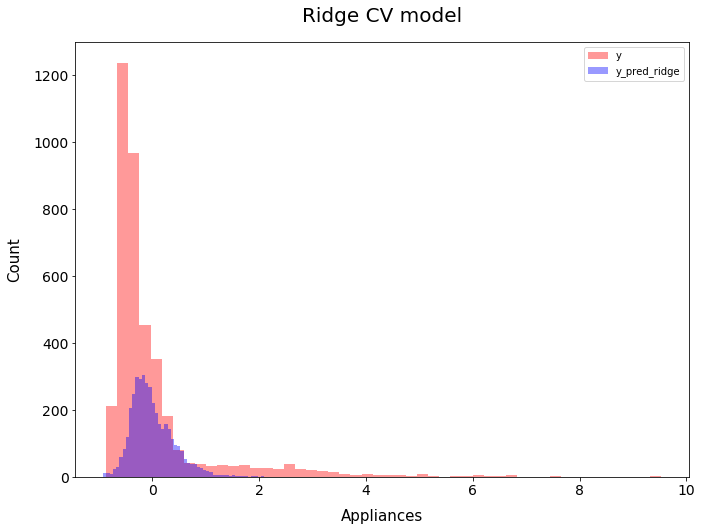

In [49]:
ridge.fit(X_train_sc, y_train_sc)

y_pred_ridge = ridge.predict(X_test_sc)#.reshape(3947,)

fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(y_test_sc, kde=False, color='red', bins=50, label='y') # instead of y_test_sc: target_sc
sns.distplot(y_pred_ridge, kde=False, color='blue', bins=50, label='y_pred_ridge')
plt.xlabel('Appliances', fontsize=15, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=15, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.title('Ridge CV model', fontsize = 20, pad = 20)
plt.show()

In [50]:
# looking at R^2 score of the training data and test data
ridge_score_train = ridge.score(X_train_sc, y_train_sc) 
ridge_score_test = ridge.score(X_test_sc, y_test_sc)

print('Riddge R^2 score on train data:\n', ridge_score_train,
      '\n\nRidge R^2 score on test data:\n', ridge_score_test)

# looking at the error values: 

# mean absolute error:
mae_ridge = metrics.mean_absolute_error(y_test_sc, y_pred_lr) 
# mean squared error:
mse_ridge = metrics.mean_squared_error(y_test_sc, y_pred_lr)
# root mean squared error:
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test_sc, y_pred_lr))

# error values:
print('\nRidge errors:')
print('\nMean Absolute Error:', mae_ridge)  
print('Mean Squared Error:', mse_ridge)  
print('Root Mean Squared Error:', rmse_ridge) 

Riddge R^2 score on train data:
 0.16136394234558338 

Ridge R^2 score on test data:
 0.14888996104031138

Ridge errors:

Mean Absolute Error: 0.5266674708550285
Mean Squared Error: 0.8511292292984213
Root Mean Squared Error: 0.9225666530383706


The linear regression models (Linear Regression, Lasso, and Ridge) are not good models for this task. I will try and use some other regression models to model the data, such as Tree Regression Ensamble models, which combine 
single decision trees to make a better prediction.

I will start with Forests of randomized trees models - averaging method (**Random Forests**, **Extremely Randomized Tree**). I will also try with **Gradient Tree Boosting** - a boosting method based model. 

### Random Forests
"A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting."

In [51]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
gb = GradientBoostingRegressor()

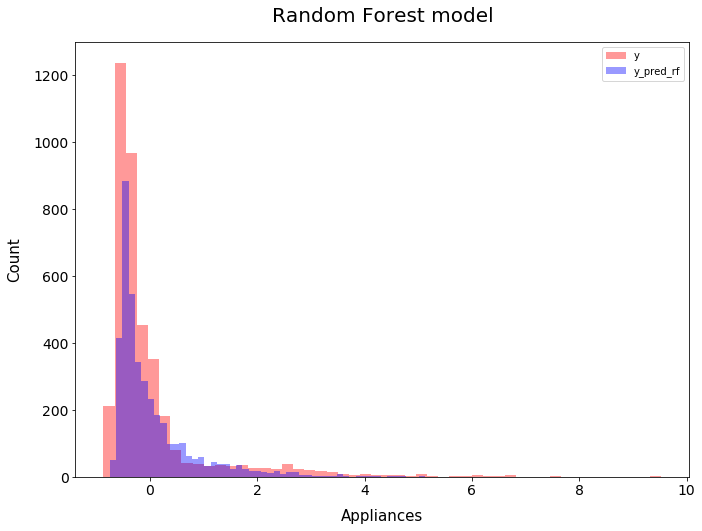

In [52]:
rf.fit(X_train_sc, y_train_sc)

y_pred_rf = rf.predict(X_test_sc)

fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(y_test_sc, kde=False, color='red', bins=50, label='y') # instead of y_test_sc: target_sc
sns.distplot(y_pred_rf, kde=False, color='blue', bins=50, label='y_pred_rf')
plt.xlabel('Appliances', fontsize=15, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=15, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.title('Random Forest model', fontsize = 20, pad = 20)
plt.show()

In [53]:
# looking at R^2 score of the training data and test data
rf_score_train = rf.score(X_train_sc, y_train_sc) 
rf_score_test = rf.score(X_test_sc, y_test_sc)

print('Random Forest R^2 score on train data:\n', rf_score_train,
      '\n\nRandom Forest R^2 score on test data:\n', rf_score_test)

# looking at the error values: 

# mean absolute error:
mae_rf = metrics.mean_absolute_error(y_test_sc, y_pred_rf) 
# mean squared error:
mse_rf = metrics.mean_squared_error(y_test_sc, y_pred_rf)
# root mean squared error:
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_sc, y_pred_rf))

# error values:
print('\nRandom Forest errors:')
print('\nMean Absolute Error:', mae_rf)  
print('Mean Squared Error:', mse_rf)  
print('Root Mean Squared Error:', rmse_rf) 

Random Forest R^2 score on train data:
 0.9096338003256289 

Random Forest R^2 score on test data:
 0.4846021916264177

Random Forest errors:

Mean Absolute Error: 0.3595187753807572
Mean Squared Error: 0.5153978083735823
Root Mean Squared Error: 0.7179121174444559


#### Remarks:
- Just by looking at the distribution histogram it is clear that Random Forest model performs much better than the linear regression models 
- R^2 score of ~0.91 on train and 0.46 in test data indicates that this is still not the best model and that the model is over fitting
- RMSE is less than 1% which is a good sign

A model that is underfit will have high training and high testing error while an overfit model will have extremely low training error but a high testing error. - find out training errors too

### Extremely Randomized Tree (Extra Trees)

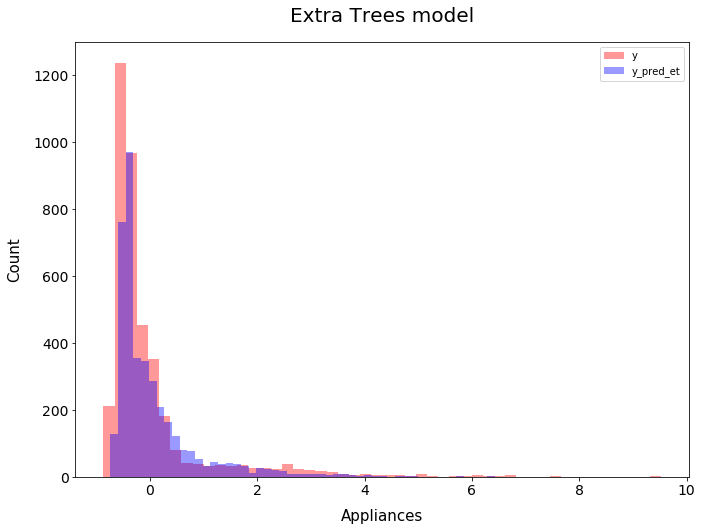

In [54]:
et.fit(X_train_sc, y_train_sc)

y_pred_et = et.predict(X_test_sc)

fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(y_test_sc, kde=False, color='red', bins=50, label='y') # instead of y_test_sc: target_sc
sns.distplot(y_pred_et, kde=False, color='blue', bins=50, label='y_pred_et')
plt.xlabel('Appliances', fontsize=15, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=15, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.title('Extra Trees model', fontsize = 20, pad = 20)
plt.show()

In [55]:
et_score_train = et.score(X_train_sc, y_train_sc) 
et_score_test = et.score(X_test_sc, y_test_sc)

print('Extra Trees R^2 score on train data:\n', et_score_train,
      '\n\nExtra Trees R^2 score on test data:\n', et_score_test)

# looking at the error values: 

# mean absolute error:
mae_et = metrics.mean_absolute_error(y_test_sc, y_pred_et) 
# mean squared error:
mse_et = metrics.mean_squared_error(y_test_sc, y_pred_et)
# root mean squared error:
rmse_et = np.sqrt(metrics.mean_squared_error(y_test_sc, y_pred_et))

# error values:
print('\nRExtra Trees errors:')
print('\nMean Absolute Error:', mae_et)  
print('Mean Squared Error:', mse_et)  
print('Root Mean Squared Error:', rmse_et) 

Extra Trees R^2 score on train data:
 1.0 

Extra Trees R^2 score on test data:
 0.5368378724118277

RExtra Trees errors:

Mean Absolute Error: 0.332915316736986
Mean Squared Error: 0.46316212758817227
Root Mean Squared Error: 0.6805601572147552


#### Remarks:
- Another good model, based on the plot
- R^2 score on the test data is 0.55 which is good, though the model is over-fitting 
- RMSE is less than 1% - good!
- So far this seems to eb the best model I've tried

### Gradient Boosting

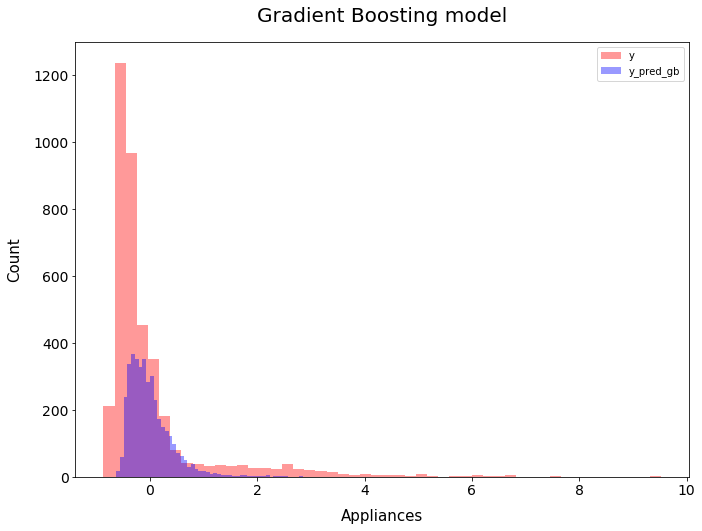

In [56]:
gb.fit(X_train_sc, y_train_sc)

y_pred_gb = gb.predict(X_test_sc)

fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(y_test_sc, kde=False, color='red', bins=50, label='y') # instead of y_test_sc: target_sc
sns.distplot(y_pred_gb, kde=False, color='blue', bins=50, label='y_pred_gb')
plt.xlabel('Appliances', fontsize=15, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=15, labelpad=11)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.title('Gradient Boosting model', fontsize = 20, pad = 20)
plt.show()

In [57]:
gb_score_train = gb.score(X_train_sc, y_train_sc) 
gb_score_test = gb.score(X_test_sc, y_test_sc)

print('Gradient Boosting R^2 score on train data:\n', gb_score_train,
      '\n\nGradient Boosting R^2 score on test data:\n', gb_score_test)

# looking at the error values: 

# mean absolute error:
mae_gb = metrics.mean_absolute_error(y_test_sc, y_pred_gb) 
# mean squared error:
mse_gb = metrics.mean_squared_error(y_test_sc, y_pred_gb)
# root mean squared error:
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test_sc, y_pred_gb))

# error values:
print('\nRGradient Boosting errors:')
print('\nMean Absolute Error:', mae_gb)  
print('Mean Squared Error:', mse_gb)  
print('Root Mean Squared Error:', rmse_gb) 

Gradient Boosting R^2 score on train data:
 0.33452869795169815 

Gradient Boosting R^2 score on test data:
 0.2578674840491578

RGradient Boosting errors:

Mean Absolute Error: 0.47241212475319083
Mean Squared Error: 0.7421325159508422
Root Mean Squared Error: 0.8614711347171431


#### Remarks:
- Not a good model
- R^2 score on the test data is 0.26 which is not so good
- RMSE is less than 1% - good!

### Different model comparison

In [58]:
models = [{'Name':'Linear Regressor',
          'Test R\u00B2 score': lr_score_test,
          'Train R\u00B2 score': lr_score_train,
          'RMSE test score': rmse_lr,
          'Mean Absolute Error': mae_lr,
          'Mean Squared Error': mse_lr},
          {'Name':'LassoCV Regressor',
          'Test R\u00B2 score': lasso_score_test,
          'Train R\u00B2 score': lasso_score_train,
          'RMSE test score': rmse_lasso,
          'Mean Absolute Error': mae_lasso,
          'Mean Squared Error': mse_lasso},
          {'Name':'RidgeCV Regressor',
          'Test R\u00B2 score': ridge_score_test,
          'Train R\u00B2 score': ridge_score_train,
          'RMSE test score': rmse_ridge,
          'Mean Absolute Error': mae_ridge,
          'Mean Squared Error': mse_ridge},
          {'Name':'Random Forest Regressor',
          'Test R\u00B2 score': rf_score_test,
          'Train R\u00B2 score': rf_score_train,
          'RMSE test score': rmse_rf,
          'Mean Absolute Error': mae_rf,
          'Mean Squared Error': mse_rf},
          {'Name':'Extra Trees Regressor',
          'Test R\u00B2 score': et_score_test,
          'Train R\u00B2 score': et_score_train,
          'RMSE test score': rmse_et,
          'Mean Absolute Error': mae_et,
          'Mean Squared Error': mse_et},
          {'Name':'Gradient Boosting Regressor',
          'Test R\u00B2 score': gb_score_test,
          'Train R\u00B2 score': gb_score_train,
          'RMSE test score': rmse_gb,
          'Mean Absolute Error': mae_gb,
          'Mean Squared Error': mse_gb}
         ]

# excluded polynomials, as they were super bad 

models_df = pd.DataFrame(models)
models_df

,Name,Test R² score,Train R² score,RMSE test score,Mean Absolute Error,Mean Squared Error
0,Linear Regressor,0.148871,0.161364,0.922567,0.526667,0.851129
1,LassoCV Regressor,0.149155,0.161292,0.922567,0.526667,0.851129
2,RidgeCV Regressor,0.148890,0.161364,0.922567,0.526667,0.851129
3,Random Forest Regressor,0.484602,0.909634,0.717912,0.359519,0.515398
4,Extra Trees Regressor,0.536838,1.000000,0.680560,0.332915,0.463162
5,Gradient Boosting Regressor,0.257867,0.334529,0.861471,0.472412,0.742133


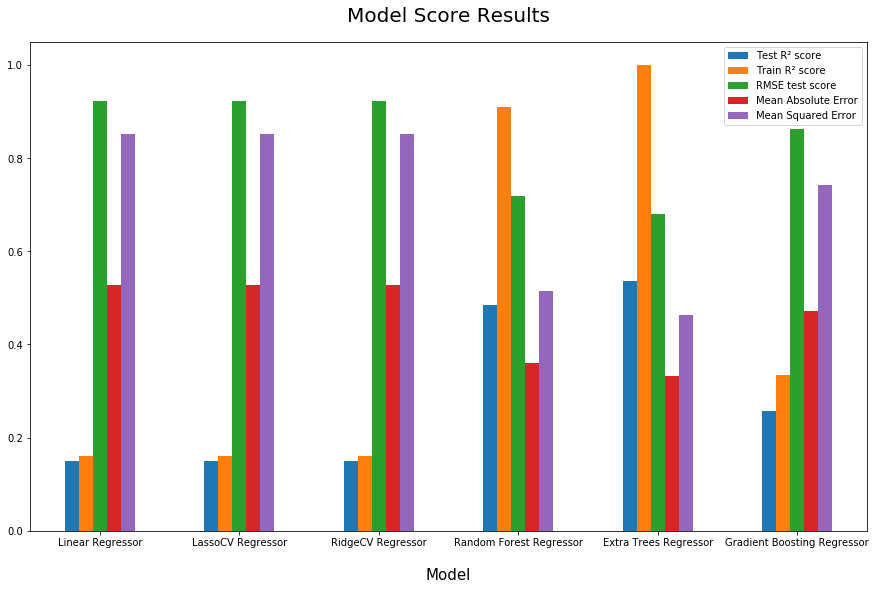

In [59]:
# plotting
models_df.plot(figsize = (15,9), kind = 'bar', x = 'Name')
plt.title('Model Score Results', fontsize = 20, pad = 20)
plt.xlabel('Model', fontsize = 15, labelpad = 20)
plt.tick_params(axis = 'x', labelrotation = 0)
plt.show()

## Conclusions:
- Out of all tested models, the **Extra Trees** regression model performed the best, as it had the highest R^2 test score (more than 50%) and the lowest root mean square error (less than 1%, though all models performed well if we're looking only at the error parameters)
- Linear regression based models definitely performed the worst, but that was to be expected as there basically aren't any strong correlations of any of the features with the target

#### Remarks:
- It would be good to determine what feature played the most important role in the prediction 
- Taking the logarithm of the target value (and some features) to make it more central (since it's positively skewed) could potentially improve the modeling